### Introduction
This notebook was finished by refering [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) and [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models) kernels.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from scipy import stats

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


### Load Data
read data and check features

In [2]:
train = pd.read_csv("./dataset/houseprices_train.csv")
test = pd.read_csv("./dataset/houseprices_test.csv")

print(train.columns)

#all_data = pd.concat([train.loc[:,"MSSubClass":"SaleCondition"], test.loc[:,"MSSubClass":"SaleCondition"]])

print("train = ", train.shape)
print("test = ", test.shape)
#print("all_data = ", all_data.shape)

#all_data.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Take a look at "SalePrice"

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

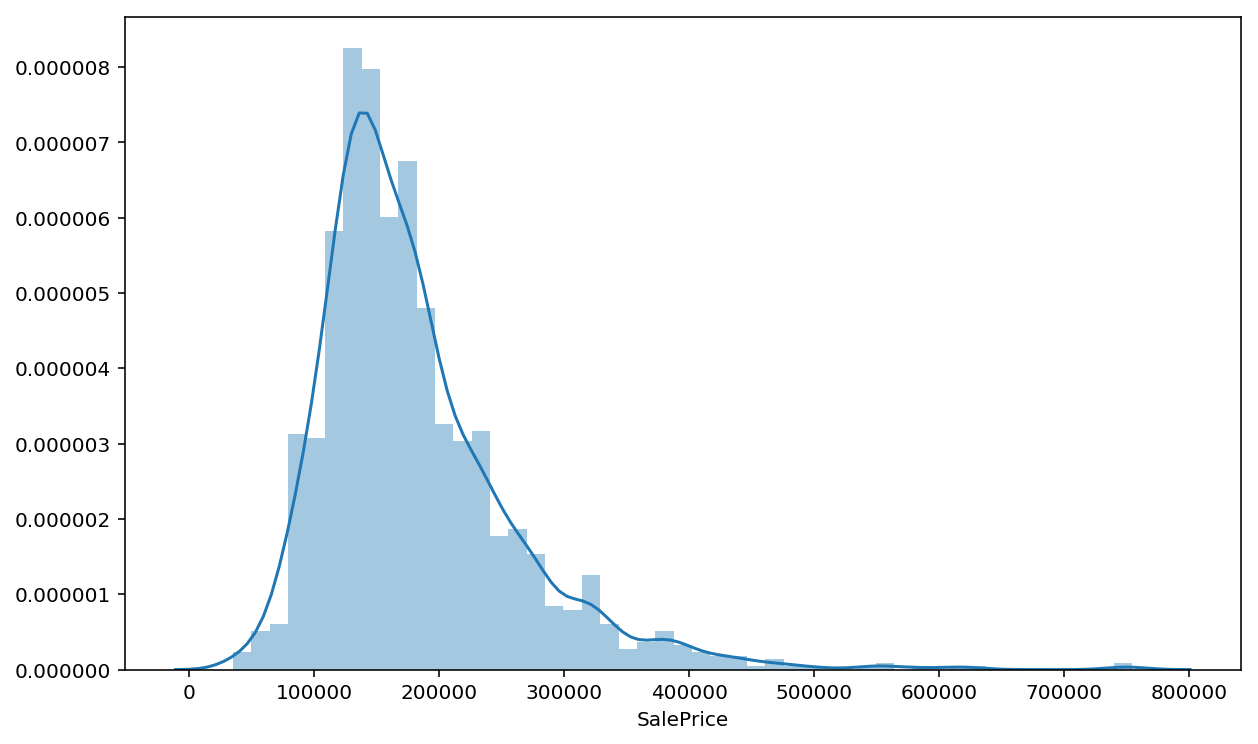

In [4]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
sns.distplot(train['SalePrice'])

The plot shows SalePrice deviating from the normal distribution and having appreciable positive skewness

In [5]:
train['SalePrice'].skew()

1.8828757597682129

In [6]:
train['SalePrice'].kurt()

6.5362818600645287

#### What is Skewness in statistics?
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.
1. negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left. A left-skewed distribution usually appears as a right-leaning curve.
2. positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right. A right-skewed distribution usually appears as a left-leaning curve.
![](Negative_and_positive_skew_diagrams.png) 
[from Wikipedia](https://en.wikipedia.org/wiki/Skewness)

#### What is Kurtosis in statistics?
![](kurtosis.gif)
[from NCKU](http://estat.ncku.edu.tw/topic/desc_stat/base/Kurtosis.html)

### Relationship between numerical variables and SalePrice

**GrLivArea**: Above grade (ground) living area square feet

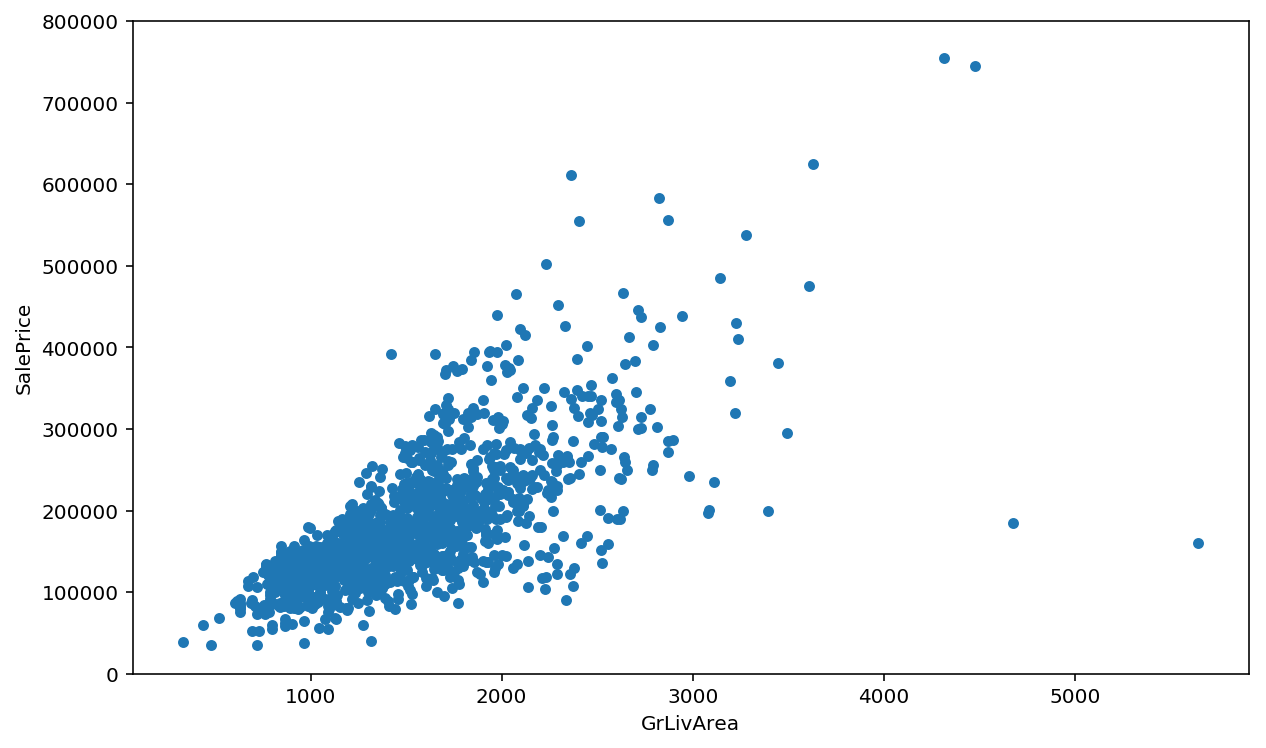

In [7]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

It seems that 'SalePrice' and 'GrLivArea' are with a **linear relationship**<br>
<br>
**TotalBsmtSF**: Total square feet of basement area

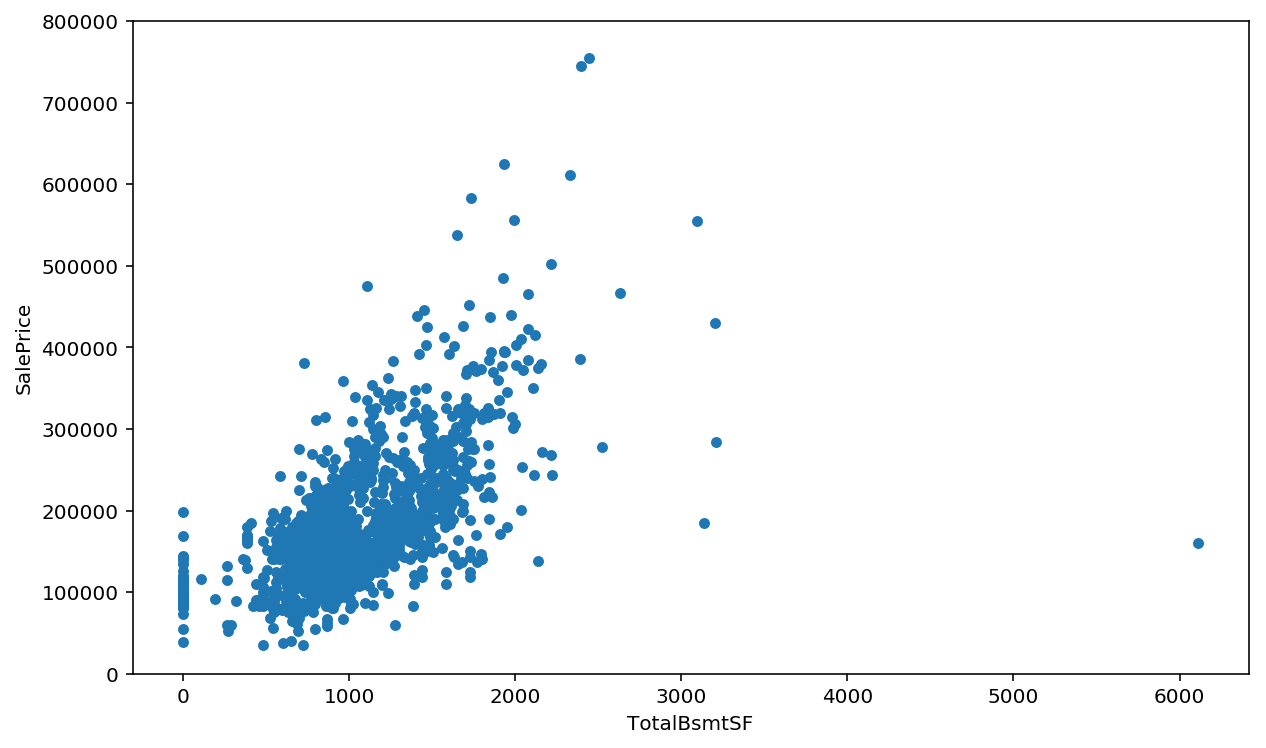

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

'SalePrices' and 'TotalBsmtSF' seems haveing a relationship in a **strong linear (exponential?)**

### Relationship between categorical features and SalePrice

**OverallQual**: Rates the overall material and finish of the house<br>
10	Very Excellent<br>
9	Excellent<br>
8	Very Good<br>
7	Good<br>
6	Above Average<br>
5	Average<br>
4	Below Average<br>
3	Fair<br>
2	Poor<br>
1	Very Poor<br>

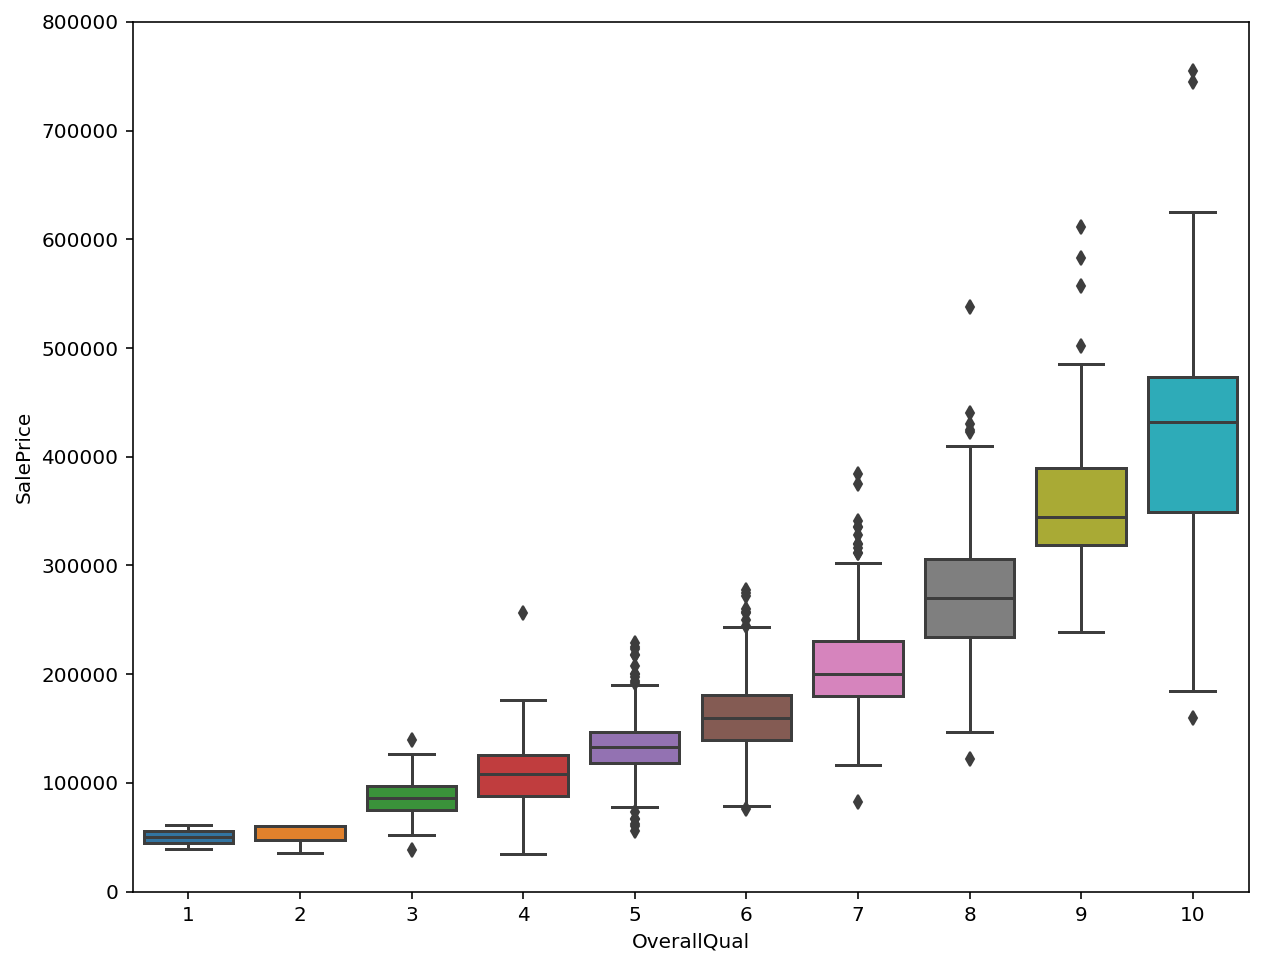

In [9]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin = 0, ymax=800000);

**YearBuilt**: Original construction date [Johnny: it should be numerical feature, shouldn't it?]

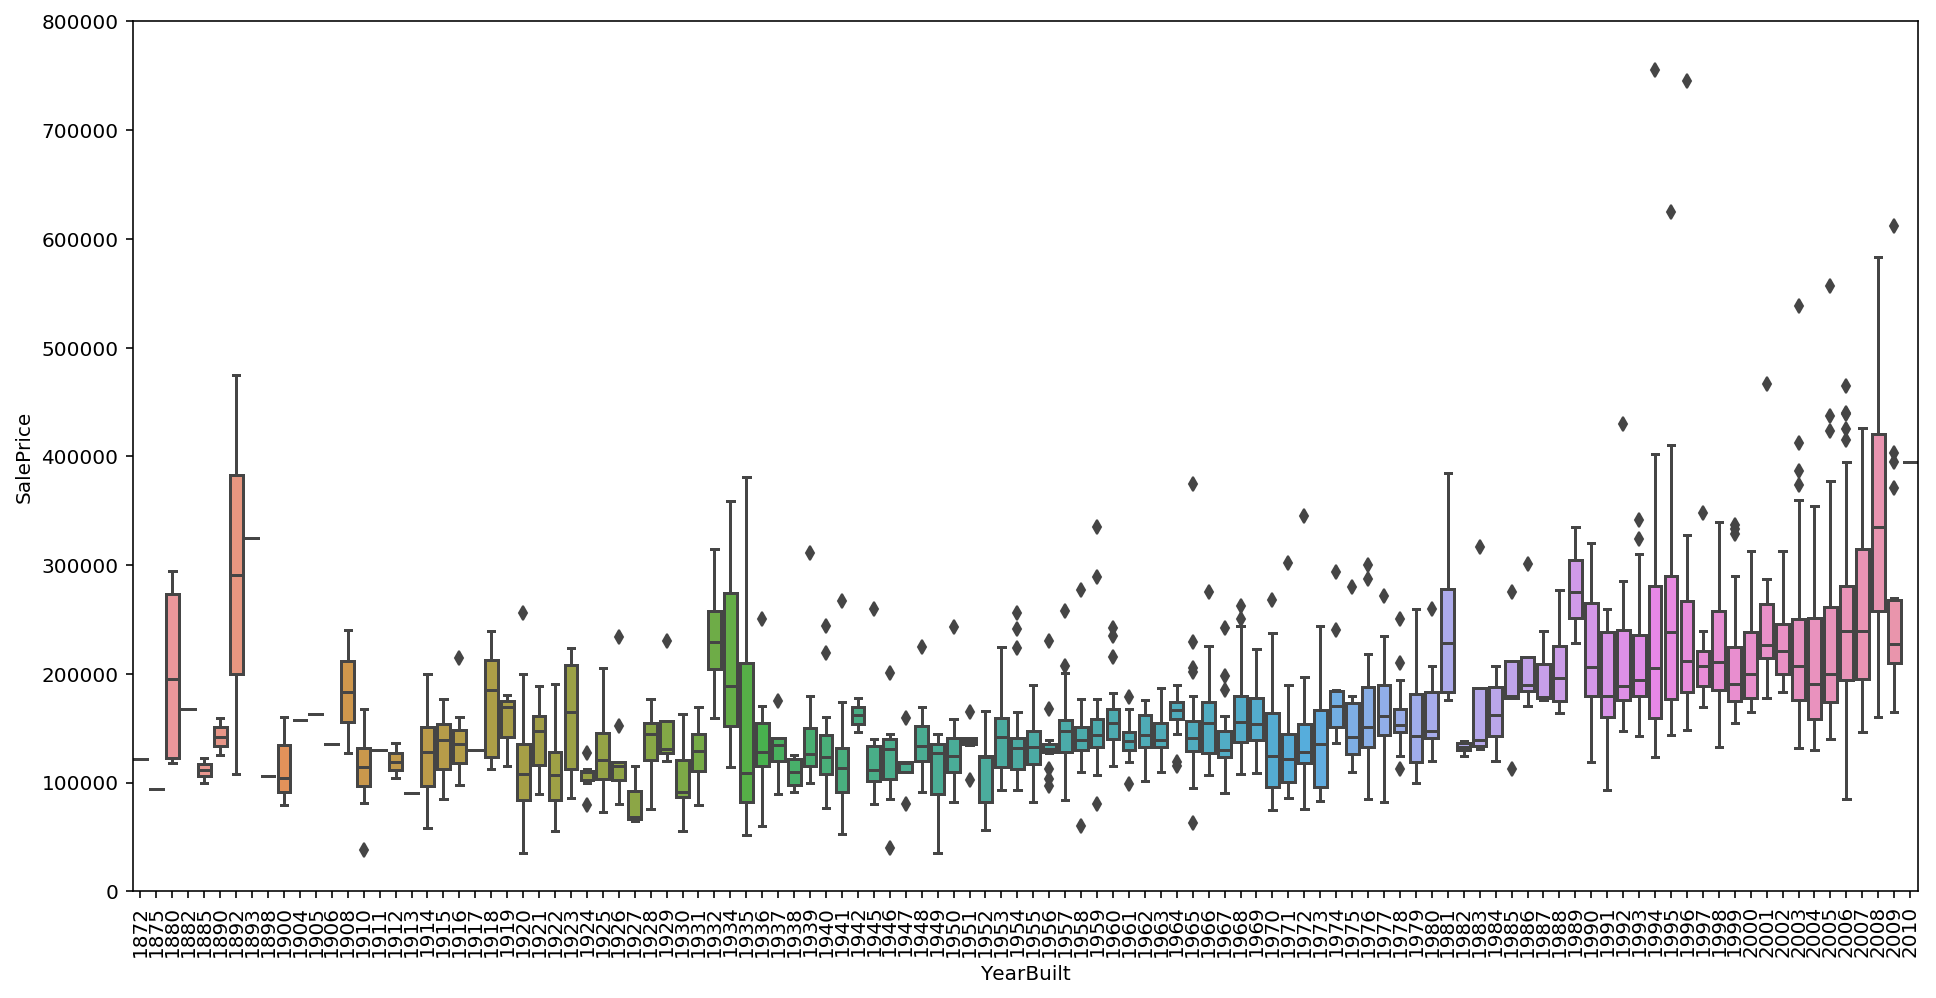

In [10]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin = 0, ymax=800000);
plt.xticks(rotation=90); # ; is used to do not show message out

Although it's not a strong tendency, 'SalePrice' is more prone to spend more money in new stuff than in old relics.<br>
[TODO] There are many other variables that we should analyse.

#### Correlation matrix

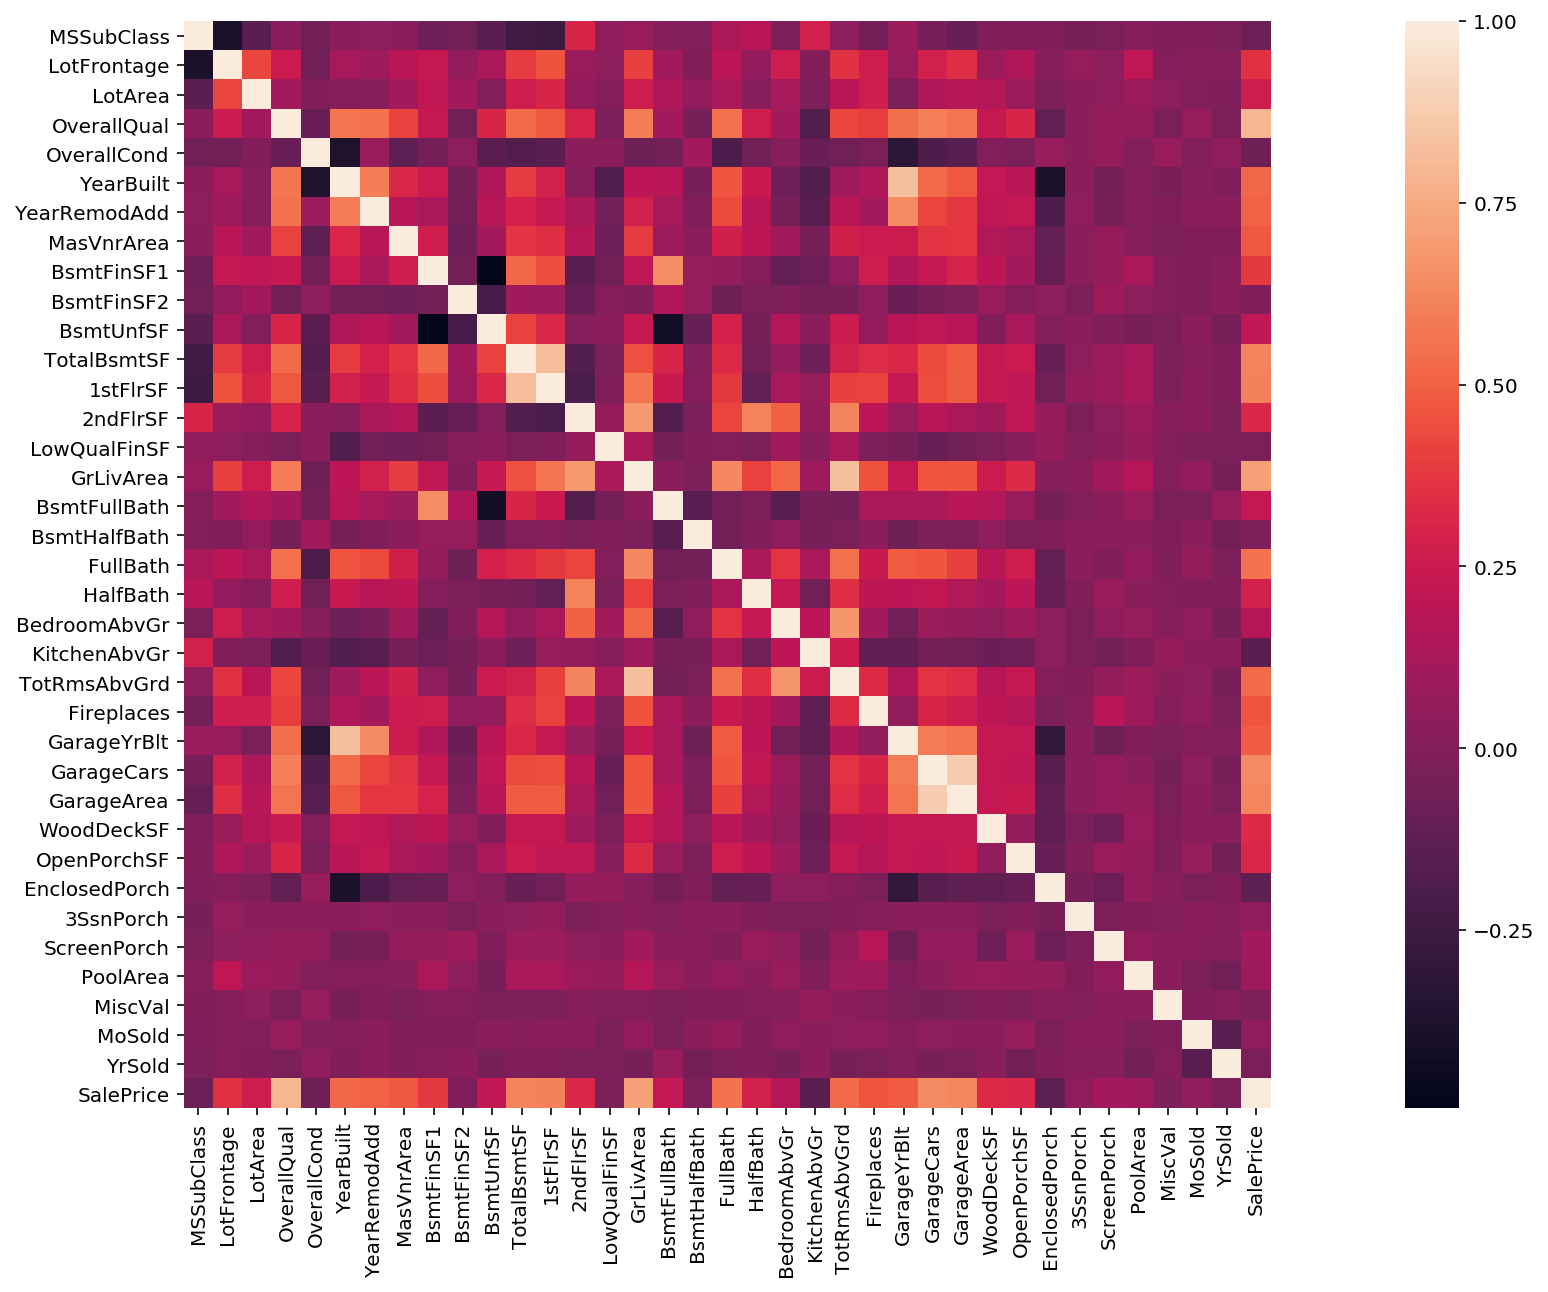

In [11]:
corrmat = train.drop('Id', axis=1).corr()
f, ax = plt.subplots(figsize=(24,10))
sns.heatmap(corrmat, vmax=1.0, square=True);

#### SalePrice correlation matrix ( top 10 )

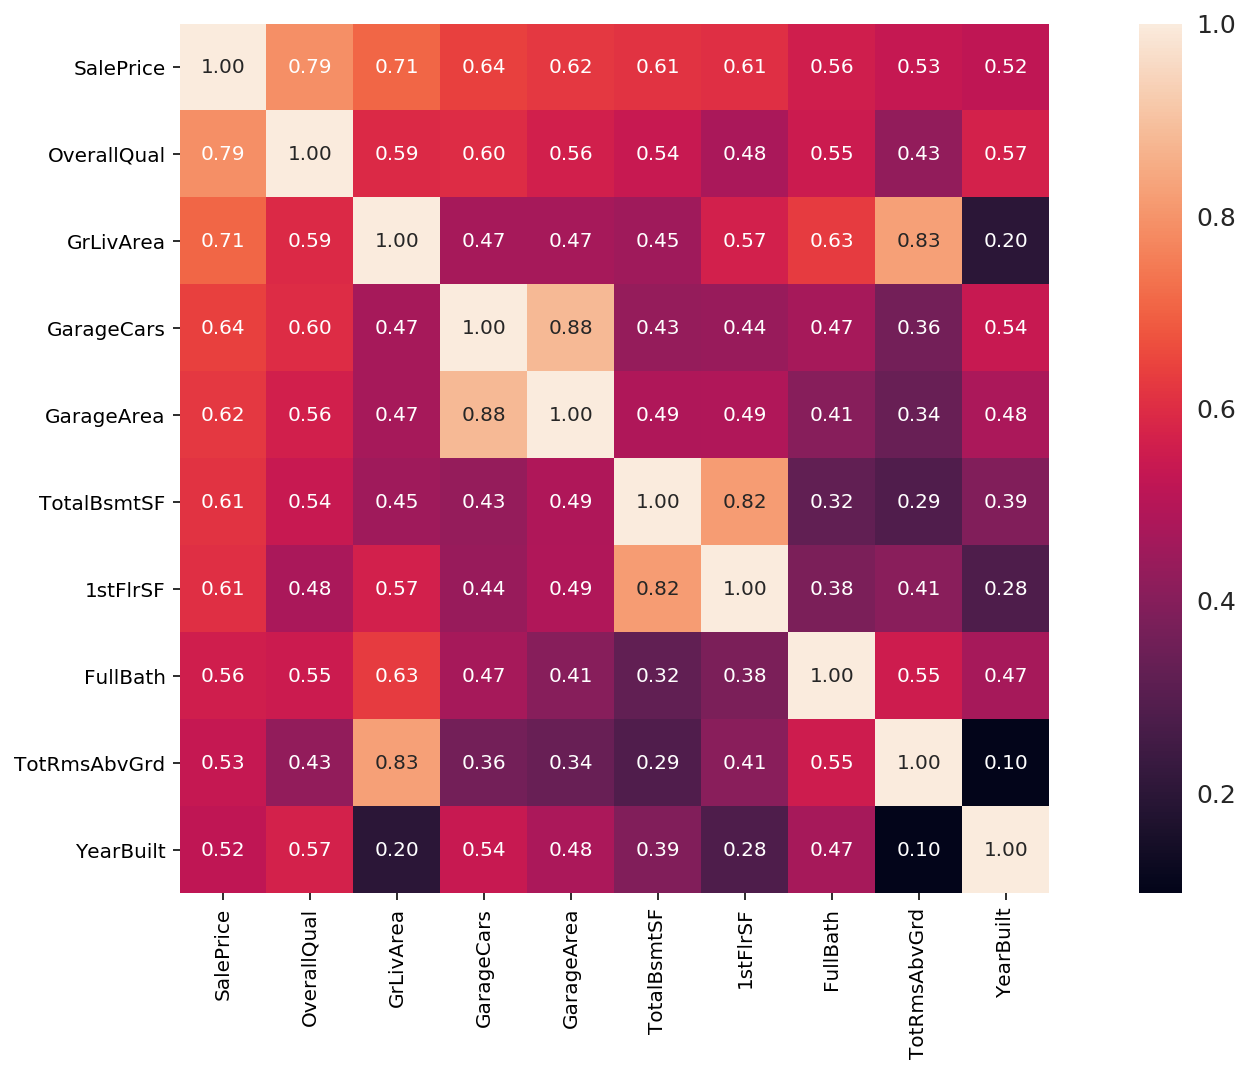

In [12]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(16,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)

- **OverallQual**, **GrLivArea**, and **TotalBsmtSF** are strongly correlated with SalePrice.
- **GarageCars** and **GarageArea** are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. GarageCars and GarageArea are like twin brothers. Never to distinguish them. Therefore, we just need one of these variables in our analysis.

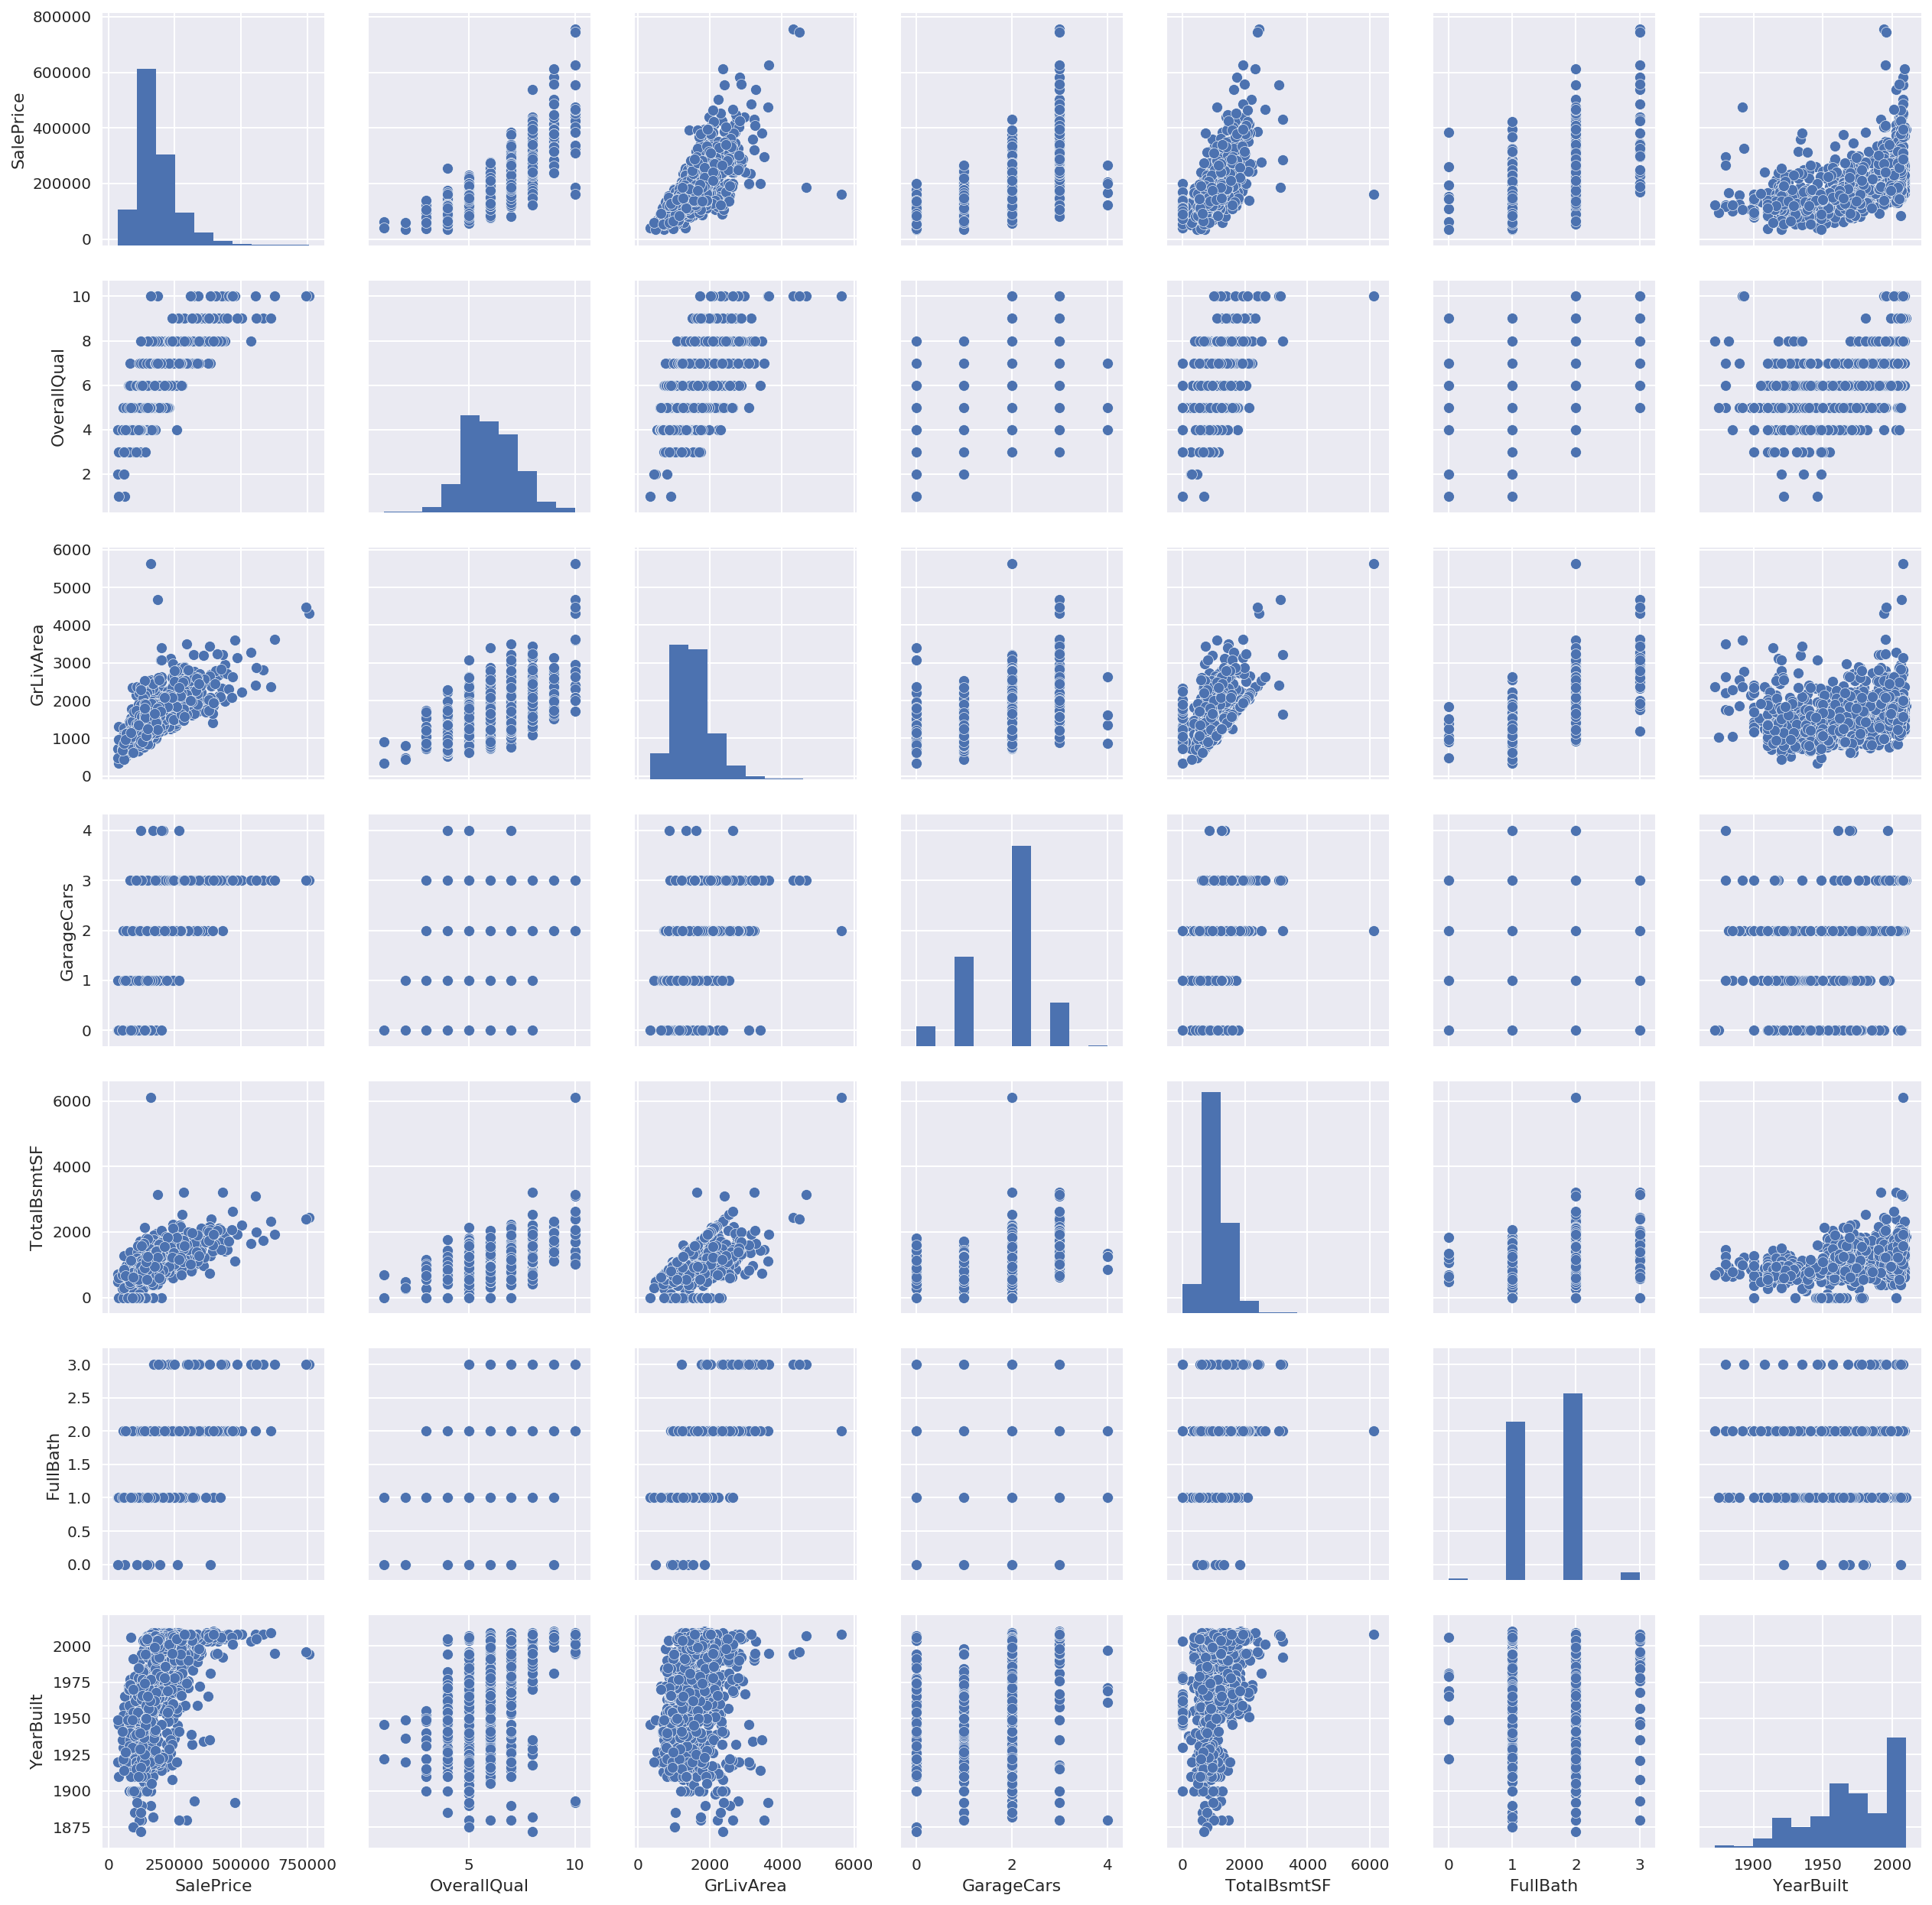

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5);

- In the figure of TotalBsmtSF and GrLivArea, we can see the dots drawing a linear line, which almost acts like a border. The majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.
- In the figure of SalePrice and YearBuild, we see that almost appears to be a shy exponential function (?)

### Missing data

In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
# print(total.head(5))
# int(percent.head(5))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house. Moreover, looking closer at the variables, we could say that variables like PoolQC, MiscFeature and FireplaceQu are strong candidates for **outliers**, so we'll be happy to delete them.<br>
<br>
GarageXXX variables have the same number of missing data. I bet missing data refers to the same set of observations. Since the most important information regarding garages is expressed by **GarageCars** and considering that we are just taking about 5% of missing data, to delete the mentioned GarageXXX variables. THe same logic applies to BsmtXXX variables.<br>
<br>
Regarding MasVnrArea and MasVnrType, we can consider these variables are not essential. Furthermore, they have a strong correlation with YearBuilt and OverallQual which are already considered. Thus, no losing information if deleting MasVnrArea and MasVnrType.<br>
<br>
[TODO]Johnny, I think it also needs to analyse test's missing data.

In [15]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
print(train.isnull().sum().max()) # just checking

test = test.drop((missing_data[missing_data['Total'] > 1]).index, 1)

all_data = pd.concat([train.loc[:,"MSSubClass":"SaleCondition"], test.loc[:,"MSSubClass":"SaleCondition"]])
all_data.head()

0


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


### Data preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac70b90d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fac70c14240>]], dtype=object)

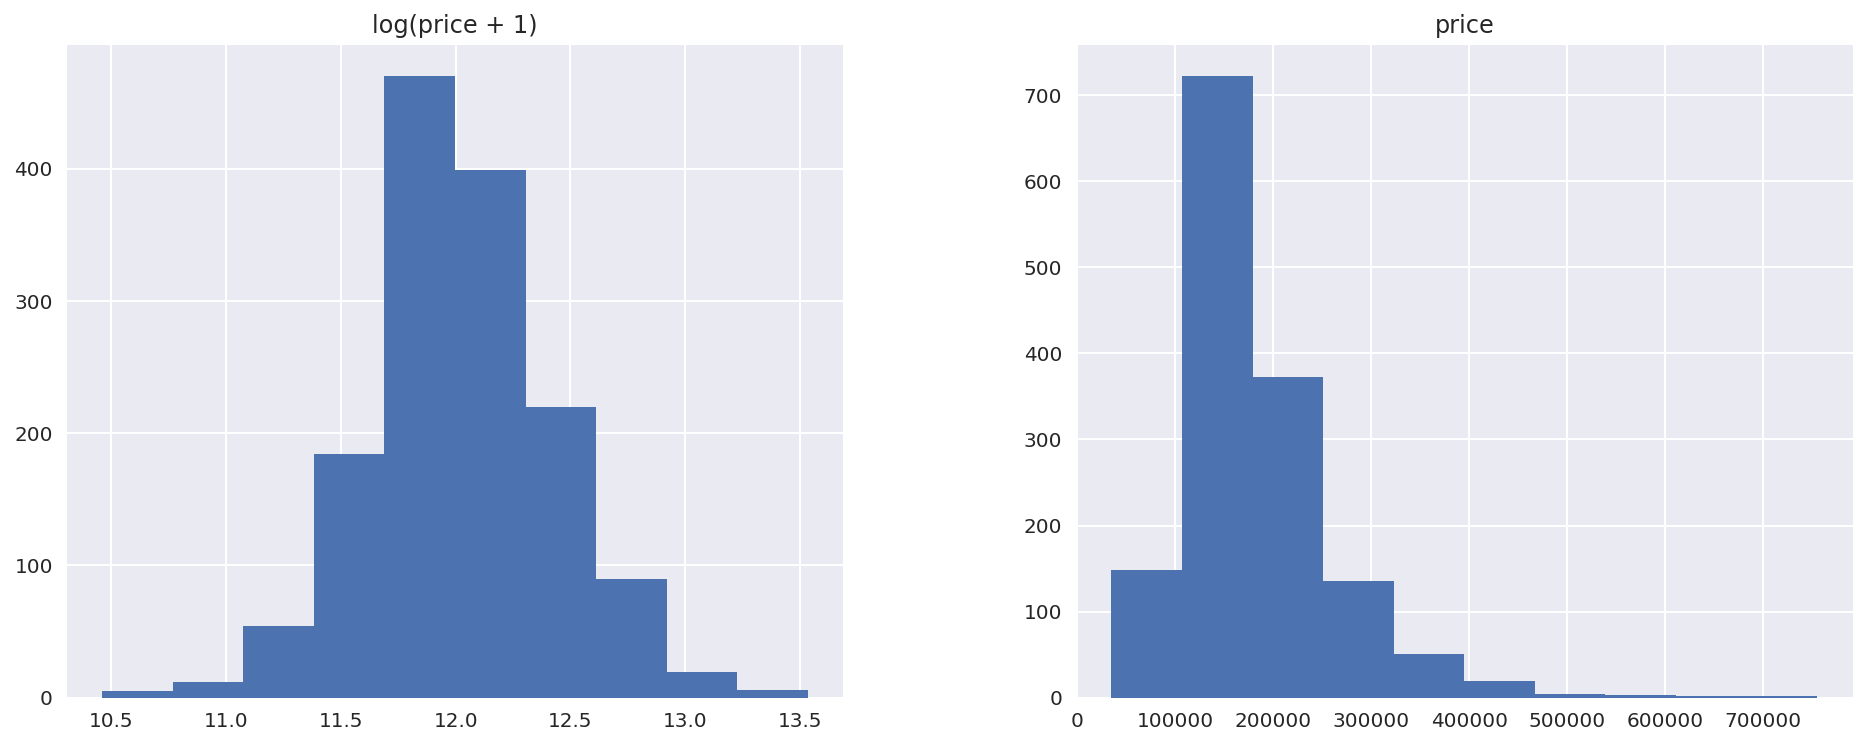

In [16]:
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

### Transform skewed numeric features

In [17]:
train["SalePrice"] = np.log1p(train["SalePrice"])

numeric_features = all_data.dtypes[all_data.dtypes != "object"].index
print(numeric_features.shape)
print(numeric_features)

(33,)
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [18]:
skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75]
print(skewed_features.shape)
print(skewed_features)

(19,)
MSSubClass        1.407171
LotArea          12.190881
BsmtFinSF1        1.683465
BsmtFinSF2        4.249219
BsmtUnfSF         0.918367
TotalBsmtSF       1.525190
1stFlrSF          1.375089
2ndFlrSF          0.813466
LowQualFinSF      8.998885
GrLivArea         1.364297
BsmtHalfBath      4.097541
KitchenAbvGr      4.482026
WoodDeckSF        1.539362
OpenPorchSF       2.361099
EnclosedPorch     3.085342
3SsnPorch        10.290132
ScreenPorch       4.116334
PoolArea         14.807992
MiscVal          24.443278
dtype: float64


In [19]:
skewed_features = skewed_features.index
all_data[skewed_features] = np.log1p(all_data[skewed_features])

Replace the numeric values (NaN's) with the mean of their respective columns

In [20]:
#s = pd.Series(list('abca'))
#print(pd.get_dummies(s))

#all_data.to_csv("./data/all_data.csv")
all_data = pd.get_dummies(all_data)
#all_data.to_csv("./data/all_data_dummies.csv")
all_data = all_data.fillna(all_data.mean())

### Models

In [21]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return(rmse)

#### Ridge Regression
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression.<br>
<br>
The main tuning parameter is **alpha**, a regularization parameter. It determines how much the costs of our features are inflated.<br>
- If alpha is chosen to be too large, it may smooth out the cost function to much and cause underfitting.
- If alpha is chosen to be too small, it may cause overfitting.

In [22]:
ridge_model = Ridge()
alphas = [0.05, 0.1, 0.3, 1.0, 3.0, 5.0, 10.0, 15.0, 30.0, 50.0, 75.0]
ridge_cv = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
print(ridge_cv)

[0.13391393909998994, 0.13320558829629117, 0.13130739578923228, 0.12873317848798216, 0.12703397120553633, 0.12662582180474327, 0.12663518879715588, 0.12707442587530249, 0.12886459098174755, 0.13113586469628055, 0.13348970470024019]


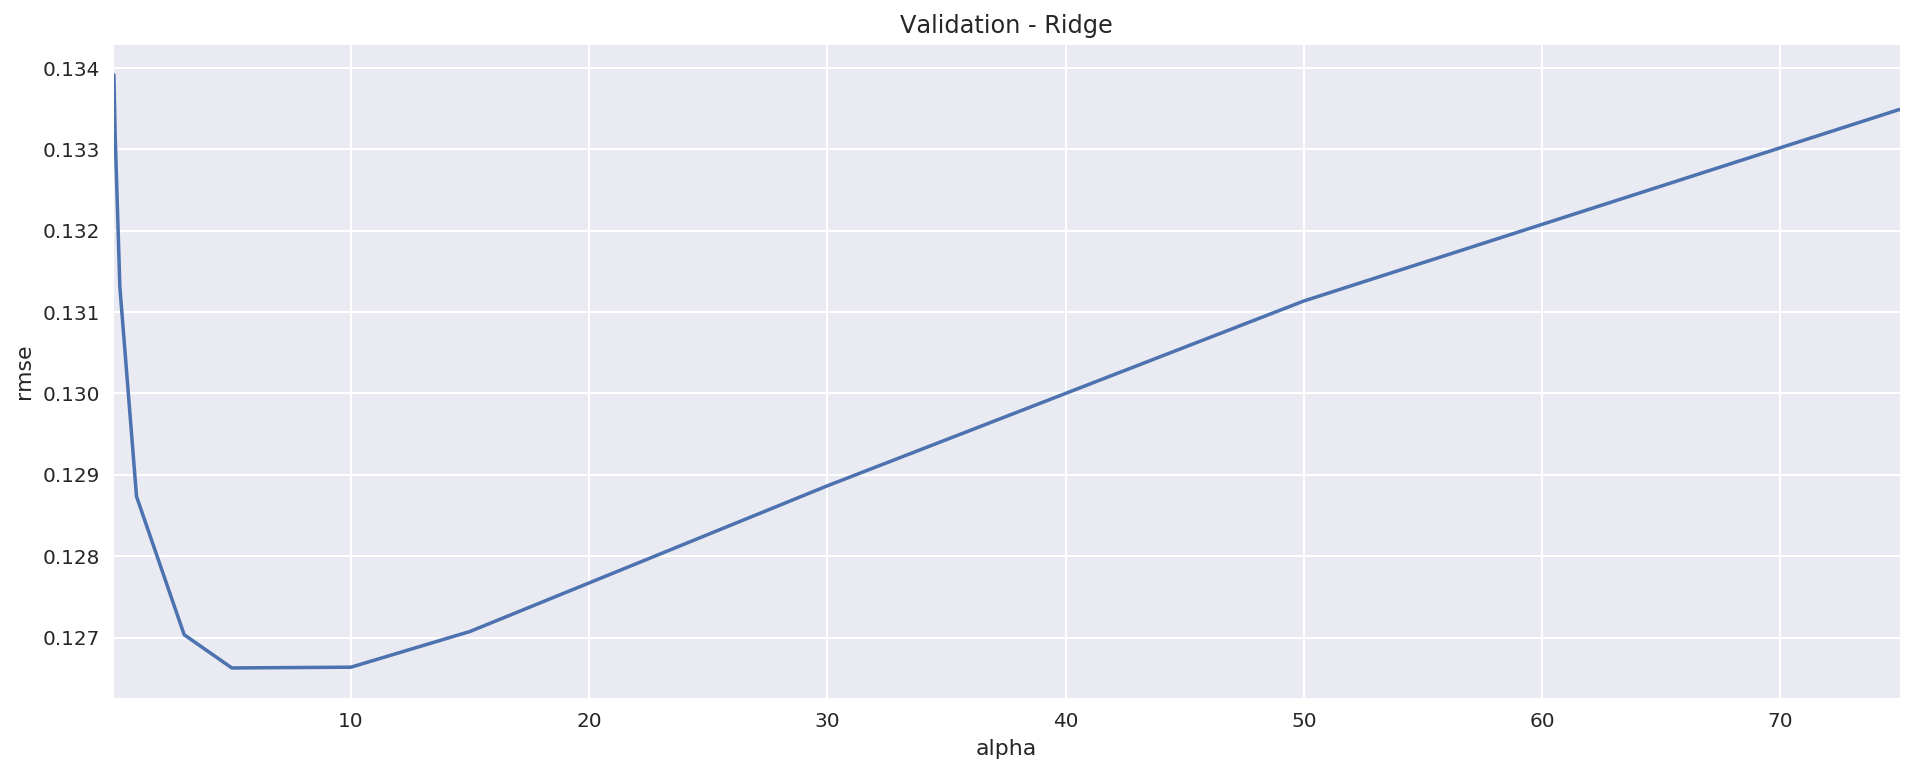

In [23]:
ridge_cv = pd.Series(ridge_cv, index = alphas)
ridge_cv.plot(title = "Validation - Ridge");
plt.xlabel("alpha")
plt.ylabel("rmse")

In [24]:
ridge_cv.min()

0.12662582180474327

So for the Ridge regression, **alpha = 10** is about right based on the plot above and **rmse = 0.127**

#### Lasso Regression

In [25]:
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(lasso_model).mean()

0.1229497979505112

Lasso does feature selection for you - setting coefficients of features it deems unimportant to zero.<br>
Let's take a look at the coefficients:

In [26]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)
print("Lasso picked %i variables and eliminated the other %i variables" % (sum(coef != 0), sum(coef == 0)))

Lasso picked 95 variables and eliminated the other 125 variables


Take a look directly at what the most important coefficients:

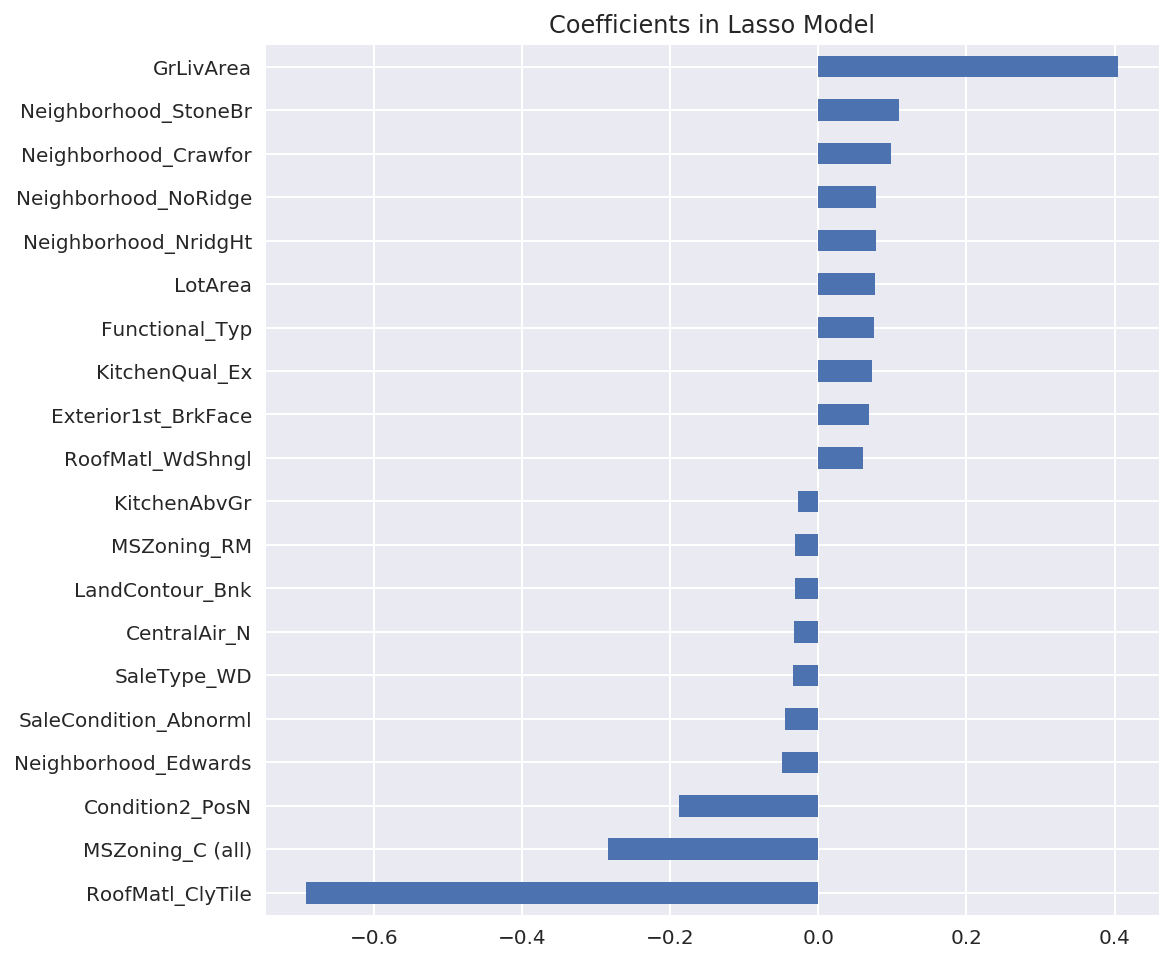

In [27]:
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in Lasso Model")

Look at the residuals as well

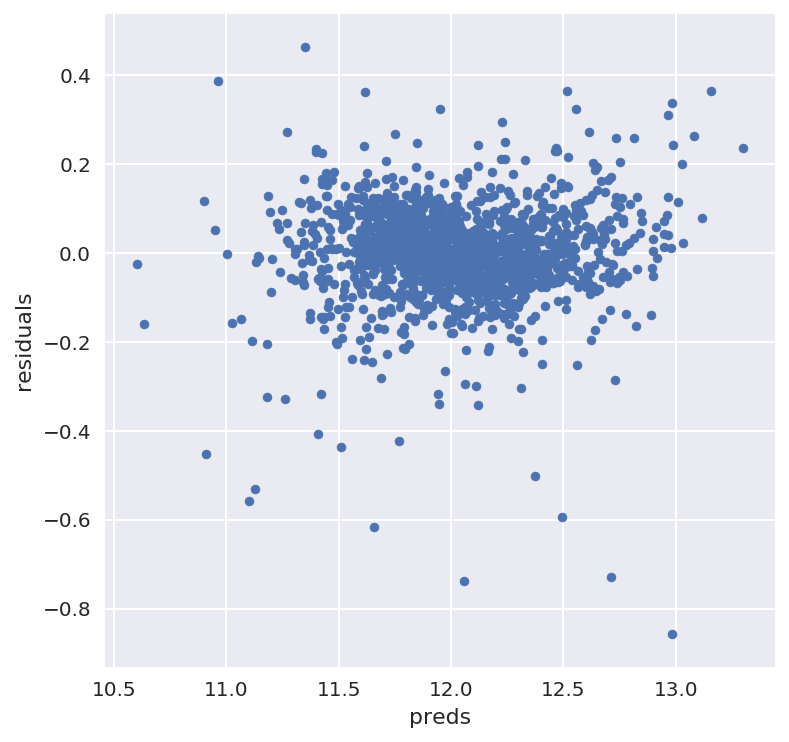

In [28]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":lasso_model.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x="preds", y="residuals", kind = "scatter")

#### XGBOOST Model

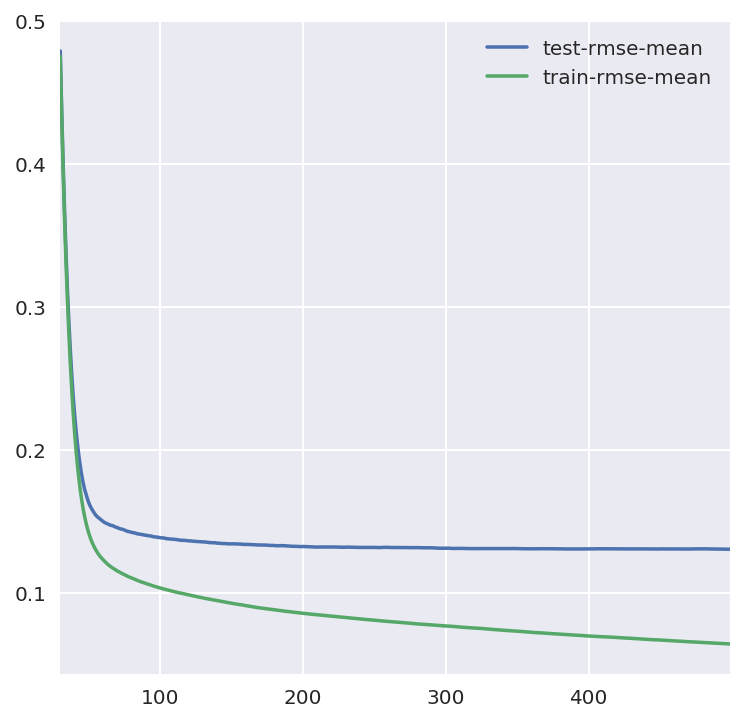

In [29]:
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [30]:
xgb_model = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
xgb_model.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

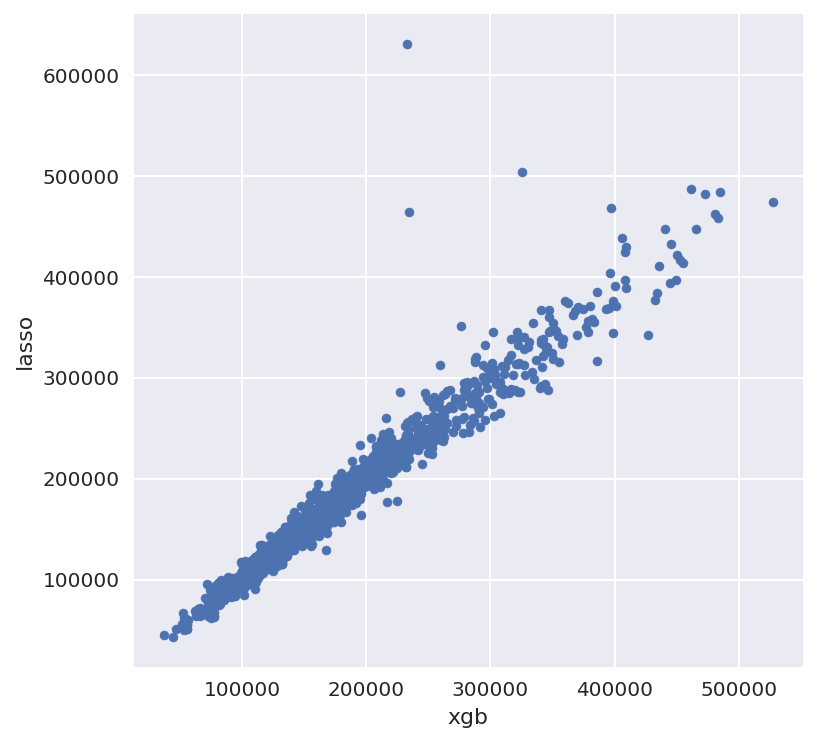

In [31]:
xgb_preds = np.expm1(xgb_model.predict(X_test)) # Element-wise exponential minus one: out = exp(x) - 1.
lasso_preds = np.expm1(lasso_model.predict(X_test))
#xgb_preds = xgb_model.predict(X_test)
#lasso_preds = lasso_model.predict(X_test)
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x="xgb", y="lasso", kind="scatter")

In this case, xgboost doesn't help that much.

#### Preparing the prediction for submission

In [32]:
preds = 0.7*lasso_preds + 0.3*xgb_preds
#preds = lasso_preds
solution = pd.DataFrame({"Id":test.Id, "SalePrice":preds})
solution.to_csv("./dataset/submit_lasso7_xgb3.csv", index = False)
#solution.to_csv("submit_lasso.csv", index = False)

Finally, I submitted and got the rank of 418. (418 / 1774 = 23.56%)<br>
![](https://raw.githubusercontent.com/johnny610926/ai_warmup_meetup/master/session01/data_analytics/kaggle_house_prices/Kaggle_House_Prices_submission_20170726.png)